## **Advances in Data Mining**

Stephan van der Putten | (s1528459) | stvdputtenjur@gmail.com  
Theo Baart | s2370328 | s2370328@student.leidenuniv.nl

### **Assignment 3**
This assignment is concerned with performing an analysis of and execute PageRank on the wikipedia links given in the `wikilink_graph.2004-03-01.csv` file. In order to do this the assignment is split up into four subtasks with each subtask receiving its dedicated `.ipynb` file. See each specific file for details on what this notebook accomplishes.

Note all implementations are based on the assignment guidelines and helper files given as well as the documentation of the used functions. 

#### **PageRank Algorithm (Improved)**
This notebook executes the PageRank algorithm using the improved storage method and algorithm as presented in the lecture (see also slide 18 of the instructional slideset). Additionally, some basic analaysis is performed and the results are compared to the "Sparse" implementation of PageRank.
___

### **Helper Functions**
This section contains functions which aid and simplify the code.
___
The following snippet handles all imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.sparse
import time
from scipy.sparse import csr_matrix
from collections import defaultdict

The class `PageRank` is our implementation for the Pagerank Algorithm

In [ ]:
class PageRank():
    def __init__(self):
        

The `load_prepped_data` function is responsible for retrieving the data prepped by `prep.ipynb` and loading it for exploratory data analysis.

In order to do this the function uses the following parameters:
  * `filename` - the name of the file containing the prepped data [default = `prep-data.npz`]
  
Additionally, it returns the following value:
  * `data` - an array representing the prepped data  

In [2]:
def load_prepped_data(filename = 'prep_data.npz'):
    data = scipy.sparse.load_npz(filename)
    return data

The following snippet triggers data loading

In [3]:
data = load_prepped_data()

The `convert_to_custom_format` function is responsible for converting the transition matrix from a sparse matrix representation to the custom format specified in slide 17 of the instructional slideset. It is assumed that the in the sparse matrix each (nonempty) column represents a source node.

In order to do this the function uses the following parameters:
  * `data` - the data as a sparse matrix
  
Additionally, it returns the following value:
  * `converted` - an array representing the converted data  

In [8]:
def convert_to_custom_format(data):
    indices = data.nonzero()
    dictionary = defaultdict(list)
    np_degree = []

    for source, destination in zip(indices[1], indices[0]):
        dictionary[source].append(destination)
    
    for s,d in dictionary.items():
        np_degree += [[s,len(d),np.array(d)]]
    
    return(np.array(np_degree))

In [134]:
# TODO TEMPORARY
%timeit convert_to_custom_format(simple_data)

88.5 µs ± 4.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%time convert_to_custom_format(data)

In [33]:
M = convert_to_custom_format(data)

### REMOVE EVERTHING BELOW THIS

In [83]:
# TODO REMOVE ME I AM TEMPORARY!
simple_data = load_prepped_data('simple_data.npz')
print(simple_data.todense())

[[0 0 0 1]
 [0 0 1 1]
 [1 0 0 0]
 [1 0 1 0]]


In [73]:
N = data.shape[0]
v_original = np.repeat(1.0 / N , N)
Beta = 0.8
v_new = np.repeat((1-Beta) / N, N)

In [74]:
from sklearn.preprocessing import normalize
M_normalized = normalize(data, norm='l1', axis=0)

In [80]:
%%prun
v_old =  v_original.copy()
mse = []
for i in range(25):
    start = time.time()
    v_new = np.repeat((1-Beta) / N, N)
    for i in range(len(M)):
        degree = M[i,[1]]
        destinations = M[i,[2]]
    #     print(f'Degree is {degree}, destinations are {destinations}')
        for destination in destinations[0]:
    #         print(f'v_new for {destination} is {v_new[destination]}')
            v_new[destination] += Beta * v_old[destination] / degree
    #         print(f'v_new for {destination} is {v_new[destination]}')
    print(f'time is {time.time() - start}')
    mse.append(((v_new - M_normalized * v_new)**2).mean())
    v_old = v_new.copy()

# analyse iteration
# MSE: v_old vs. v_new
# v_old == v_new
#TODO: Analyzes

time is 16.05258083343506
time is 16.188412189483643
time is 15.975532531738281
time is 15.837153434753418
time is 15.893394947052002
time is 16.016355991363525
time is 15.895385980606079
time is 15.886227130889893
time is 15.816770553588867
time is 15.825418472290039
time is 16.050198078155518
time is 15.874647855758667
time is 15.965051174163818
time is 15.918271541595459
time is 15.924828290939331
time is 15.858988285064697
time is 15.903129577636719
time is 15.947254657745361
time is 15.960615634918213
time is 15.932201623916626
 

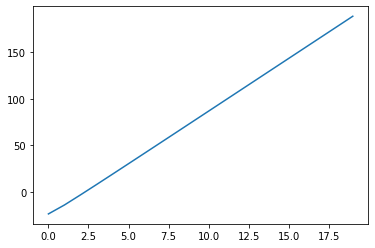

In [86]:
#Should be declining, Double check
plt.plot(list(range(20)), np.log(mse))
plt.show()

In [85]:
#Check mse
for i in mse:
    print(np.log(i))

-23.160422980160064
-13.60699820137293
-2.820890875659146
8.198290719102184
19.32929874778344
30.515996405905042
41.733833027386055
52.97057140649708
64.21930590106984
75.47581386603505
86.73740197011549
98.00231925119587
109.26941902705583
120.53794884195489
131.8074149961606
143.0774938304229
154.34797335399742
165.61871482593978
176.8896274998714
188.16065204721446
